# Analysis and Visualisation



For accurate analysis, we use the original dataset for the actual values of money, which existed before we altered their values and distributions in the previous explroatory data analysis.

In [1]:
import sys
sys.path.insert(0, ".")

from pathlib import Path
import db_utils
import pandas as pd

db_utils

df = pd.read_csv('loan_payments.csv')
df

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type
0,38676116,41461848,8000,8000.0,8000.0,36 months,7.49,248.82,A,A4,...,0.00,0.00,Jan-2022,248.82,Feb-2022,Jan-2022,0.0,5.0,1,INDIVIDUAL
1,38656203,41440010,13200,13200.0,13200.0,36 months,6.99,407.52,A,A3,...,0.00,0.00,Jan-2022,407.52,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL
2,38656154,41439961,16000,16000.0,16000.0,36 months,7.49,497.63,A,A4,...,0.00,0.00,Oct-2021,12850.16,NaN,Oct-2021,0.0,NaN,1,INDIVIDUAL
3,38656128,41439934,15000,15000.0,15000.0,36 months,14.31,514.93,C,C4,...,0.00,0.00,Jun-2021,13899.67,NaN,Jun-2021,0.0,NaN,1,INDIVIDUAL
4,38656121,41439927,15000,15000.0,15000.0,36 months,6.03,456.54,A,A1,...,0.00,0.00,Jan-2022,456.54,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54226,76597,76583,5000,5000.0,1775.0,36 months,9.01,159.03,B,B2,...,0.00,0.00,Jul-2016,160.61,NaN,Jul-2016,NaN,NaN,1,INDIVIDUAL
54227,142608,74724,5000,5000.0,2350.0,36 months,10.59,162.73,C,C2,...,0.00,0.00,Oct-2016,490.01,NaN,Sep-2016,0.0,NaN,1,INDIVIDUAL
54228,117045,70978,3500,3500.0,2225.0,36 months,7.43,108.77,A,A2,...,0.00,0.00,Sep-2016,110.58,Sep-2016,May-2013,NaN,NaN,1,INDIVIDUAL
54229,88854,70699,5000,5000.0,225.0,36 months,7.43,155.38,A,A2,...,0.00,0.00,Mar-2014,0.00,NaN,May-2013,NaN,NaN,1,INDIVIDUAL


## Current State of the Loans




We will query the data to check the current state of the payments:

What percentage of the loans are recovered against the investor funding and the total amount funded?

We can visualise the results on a scatter graph.



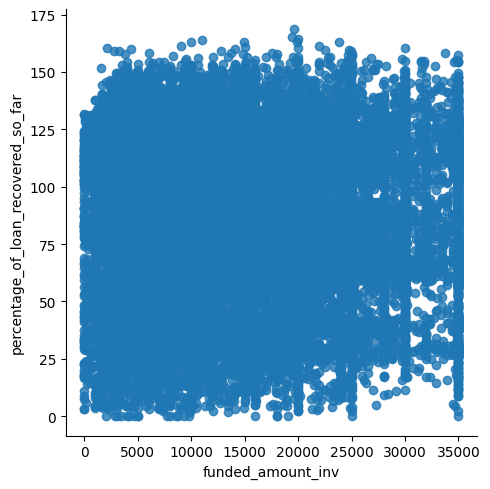

In [2]:
import seaborn as sns

# from Plotter import Plotter
# plotter_instance = Plotter()

# for each row in df:
#     percentage_of_loan_recovered_so_far = 100*total_payment/loan_amount
#     total_funded = funded_amount + funded_amount_inv

df['percentage_of_loan_recovered_so_far'] = 100*df.total_payment/df.loan_amount

# print('percentage_of_loan_recovered_so_far:')
# print(percentage_of_loan_recovered_so_far)

# plotter_instance.scattergraph(df, df.funded_amount , percentage_of_loan_recovered_so_far)


sns.lmplot(data=df, x='funded_amount_inv', y='percentage_of_loan_recovered_so_far')

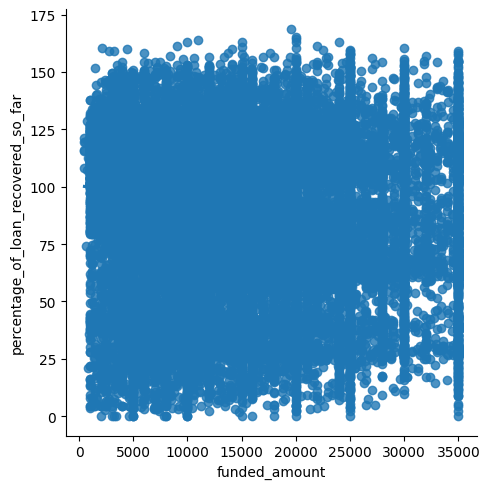

In [3]:
sns.lmplot(data=df, x='funded_amount', y='percentage_of_loan_recovered_so_far')

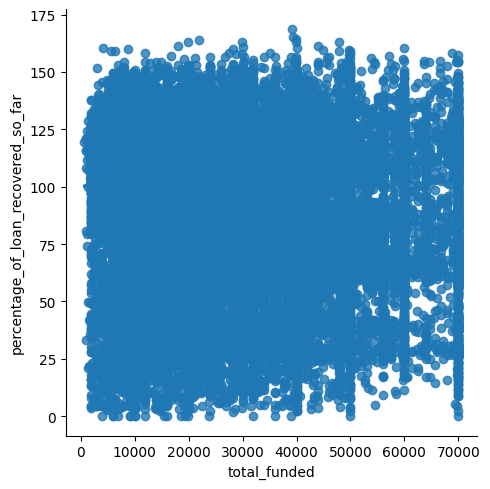

In [4]:
df['total_funded'] = df.funded_amount + df.funded_amount_inv

sns.lmplot(data=df, x='total_funded', y='percentage_of_loan_recovered_so_far')

We can also visualise what percentage of the total amount would be recovered up to 6 months' in the future:

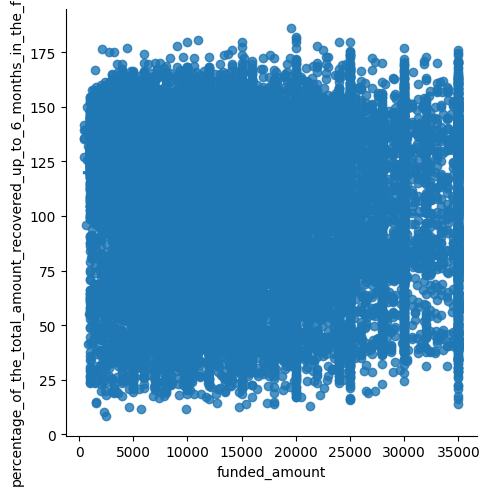

In [5]:
df['percentage_of_the_total_amount_recovered_up_to_6_months_in_the_future'] = 100*(df.total_payment+df.instalment*6)/df.loan_amount

# plotter_instance.scattergraph(df.loan_amount, percentage_of_the_total_amount_recovered_up_to_6_months_in_the_future)

sns.lmplot(data=df, x='funded_amount', y='percentage_of_the_total_amount_recovered_up_to_6_months_in_the_future')


## Calculating Loss

The company wants to check what percentage of loans have been a loss to the company.

Loans marked as Charged Off in the loan_status column represent a loss to the company.

In [6]:
100*df['loan_status'].value_counts()['Charged Off']/df['id'].count()


10.272722243735133

Approximately 10% of loans have historically become Charged Off.

In [7]:
# createa mask of rows that have been charged-off
charged_off_index_list = df.index[df['loan_status'] == 'Charged Off']

# then find the sum of total_payment ofr thsoe rows
sum(df.total_payment[charged_off_index_list])

37400589.04081948

The total amount that was paid towards these loans before being charged off is 37,400,589

## Calculating Projected Loss

We can calculate the projected loss of the loans marked as Charged Off:

In [8]:
df.loan_amount - df.out_prncp

0         2470.30
1         4097.17
2        16000.00
3        15000.00
4         4702.53
           ...   
54226     5000.00
54227     5000.00
54228     3500.00
54229     5000.00
54230     5000.00
Length: 54231, dtype: float64

In [9]:
df.out_prncp[charged_off_index_list]

7        0.0
56       0.0
83       0.0
90       0.0
117      0.0
        ... 
54152    0.0
54156    0.0
54180    0.0
54194    0.0
54198    0.0
Name: out_prncp, Length: 5571, dtype: float64

In [10]:
df.loan_amount[charged_off_index_list]

7        26500
56       11200
83        1325
90        8150
117       7000
         ...  
54152     8000
54156     2125
54180     2500
54194     1000
54198    20000
Name: loan_amount, Length: 5571, dtype: int64

In [11]:
df.total_rec_prncp[charged_off_index_list]

7         1197.35
56         885.52
83         176.69
90        1045.20
117        321.84
           ...   
54152     5717.45
54156      943.58
54180     1730.83
54194      544.02
54198    16077.42
Name: total_rec_prncp, Length: 5571, dtype: float64

In [12]:
df.loan_amount[charged_off_index_list] - df.total_rec_prncp[charged_off_index_list]

7        25302.65
56       10314.48
83        1148.31
90        7104.80
117       6678.16
           ...   
54152     2282.55
54156     1181.42
54180      769.17
54194      455.98
54198     3922.58
Length: 5571, dtype: float64

In [13]:
df.loan_amount[charged_off_index_list] - df.total_payment[charged_off_index_list]

7        22317.730000
56        9293.490000
83        1042.220000
90        6341.950000
117       5345.860000
             ...     
54152      705.350000
54156     -455.248838
54180      413.370000
54194      296.050000
54198     -339.660000
Length: 5571, dtype: float64

We can changes the categrories of the term lengths into integers:

In [14]:
set(df.term)

{'36 months', '60 months', nan}

In [15]:
# df['term'][charged_off_index_list] = df['term'][charged_off_index_list].astype(str)

# df['term'][charged_off_index_list] = df['term'][charged_off_index_list].str.replace(' months', '')

# df['term'][charged_off_index_list] = df['term'][charged_off_index_list].astype(int)

In [16]:
df['term'] = df['term'].astype(str)

# df['term'] = df['term'].str.replace(' months', '')

df['term'] = df['term'].map(lambda x: x.rstrip(' months') if x != 'nan' else False)

df['term'] = df['term'].astype(int)

In [17]:
# df['how_much_the_borrower_must_pay_in_total'] = df.apply(lambda row : row['term'] * row['instalment'])

df['how_much_the_borrower_must_pay_in_total'] = df.term * df.instalment

# df = df.assign(how_much_the_borrower_must_pay_in_total = lambda x : x.term * x.instalment)

In [50]:

    
df['amount_left_to_pay'] = df.how_much_the_borrower_must_pay_in_total[charged_off_index_list] - df.total_payment[charged_off_index_list]

sum(df.how_much_the_borrower_must_pay_in_total[charged_off_index_list] - df.total_payment[charged_off_index_list])

# sum(df.amount_left_to_pay)

56673594.919180475


The revenue that the Charged Off loans would have generated for the company if they had finished their term is 56,673,594

We can visualise the loss projected over the remaining term of these loans.

We transform the data into dates to make it easier to deal with as amounts of months.

In [19]:
from DataTransform import DataTransform
df_transforming_instance = DataTransform()

for column_name in ('issue_date', 'last_payment_date', 'next_payment_date', 'last_credit_pull_date'):
            df = df_transforming_instance.date_convert(df, column_name)

We can determine how much tiem each borrower actually paid their loan:

In [42]:

#  y-axis is 
df['how_much_the_charged_off_borrower_must_pay_in_total'] = df.how_much_the_borrower_must_pay_in_total[charged_off_index_list]

# # # # # # # # # # # # # # # # # # # # # # # # # # # # 

# print(df.last_payment_date - df.issue_date)

# f = pd.Timedelta(df.last_payment_date - df.issue_date).to_period('M')

# print(f)
df['actual_payment_duration'] = df.last_payment_date - df.issue_date

df['actual_payment_duration']


0        365 days
1        365 days
2        273 days
3        151 days
4        365 days
           ...   
54226   1096 days
54227   1096 days
54228   1127 days
54229    212 days
54230    243 days
Name: actual_payment_duration, Length: 54231, dtype: timedelta64[ns]

In [33]:

df['actual_payment_duration'] = df.actual_payment_duration[charged_off_index_list]

df['actual_payment_duration']


0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
54226   NaN
54227   NaN
54228   NaN
54229   NaN
54230   NaN
Name: actual_payment_duration, Length: 54231, dtype: float64

In [34]:
print(set(df['actual_payment_duration']))

{nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 30.0, 31.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 59.0, nan, 61.0, 62.0, nan, nan, nan, 60.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 90.0, 91.0, 92.0, nan, nan, nan, 89.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 120.0, 121.0, 122.0, nan, nan, nan, 123.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 150.0, 151.0, 152.0, nan, nan, nan, 153.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 181.0, 182.0, 183.0, nan, nan, nan, nan, 184.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 212.0, 213.0, nan, nan, 215.0, nan, 214.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 242.0, 243.0, 244.0, nan, nan, nan, 245.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 273.0, 274.0, 275.0, nan, nan, nan, nan, 276.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 304.0, 305.0, na

In [ ]:

df['actual_payment_duration'] = df['actual_payment_duration'].astype(int)




# x-axis is 
df['remaining_term_in_days'] = df.term*30 - df.actual_payment_duration

# (timedifference bwteen last_payment_date and issue_date)



# instalment * remainign term




In [ ]:
df['term']*30

0        1080
1        1080
2        1080
3        1080
4        1080
         ... 
54226    1080
54227    1080
54228    1080
54229    1080
54230    1080
Name: term, Length: 54231, dtype: int64

In [ ]:
df.iloc[0]

id                                                                                  38676116
member_id                                                                           41461848
loan_amount                                                                             8000
funded_amount                                                                         8000.0
funded_amount_inv                                                                     8000.0
term                                                                                      36
int_rate                                                                                7.49
instalment                                                                            248.82
grade                                                                                      A
sub_grade                                                                                 A4
employment_length                                                     

In [ ]:
df['remaining_term_in_days']

0        715.0
1        715.0
2        807.0
3        929.0
4        715.0
         ...  
54226    -16.0
54227    -16.0
54228    -47.0
54229    868.0
54230    837.0
Name: remaining_term, Length: 54231, dtype: float64

In [40]:
df['charged_off_remaining_term_in_days'] = df['remaining_term_in_days'][charged_off_index_list]

We can visualise the loss projected over the remaining term of these loans:

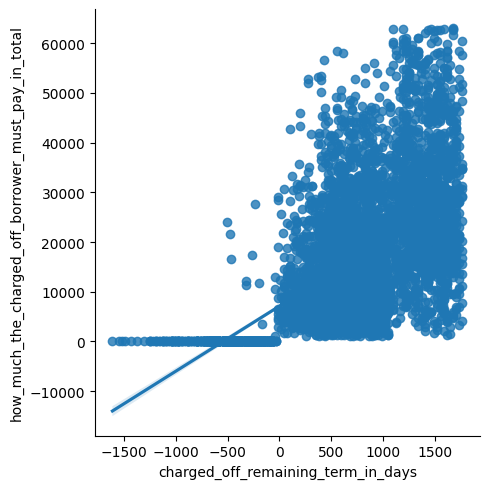

In [43]:

sns.lmplot(data=df, x='charged_off_remaining_term_in_days', y='how_much_the_charged_off_borrower_must_pay_in_total')

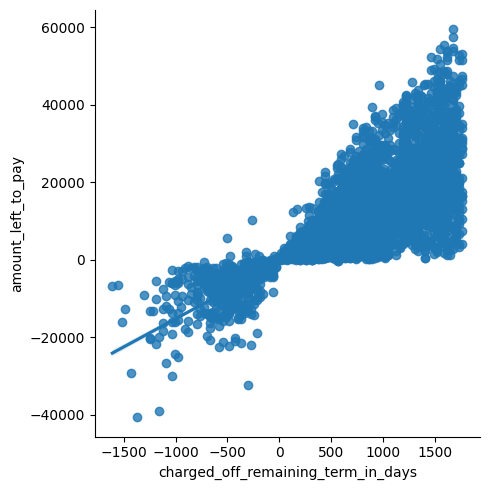

In [51]:

sns.lmplot(data=df, x='charged_off_remaining_term_in_days', y='amount_left_to_pay')